In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns




# Create the DataFrames
manual_stacked_data = pd.DataFrame({
    "Carbon Number": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
    "Aromatics": [0, 0, 0, 0, 0, 0, 0, 0.001524396949, 0.00005864025393, 0, 0, 0, 0, 0, 0],
    "Linear Alkanes": [0, 0, 0, 0, 0.9357490583, 0.2257996024, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    "Branched Alkanes": [0, 0, 0, 0, 4.928039771, 1.631019717, 0.6621199497, 0.1285317163, 0.0104698777, 0.0001546728551, 0, 0, 0, 0, 0],
    "Cycloalkanes": [0, 0, 0, 0, 1.441310671, 0.05867268022, 0.01647430267, 0, 0.00005109948726, 0.00004901627206, 0, 0, 0, 0, 0],
    "Alkenes/Alkynes": [0, 0, 0, 0, 0.09548579355, 0.8954805063, 0.09672423141, 0.01166989567, 0.001186856452, 0, 0, 0, 0, 0, 0],
    "Other": [0, 0, 0, 0, 0.00478001197, 0.0002441278605, 0, 0, 0.003781766277, 0, 0, 0, 0, 0, 0.0007377411918],
})

chromaquant_stacked_data = pd.DataFrame({
    "Carbon Number": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
    "Linear Alkanes": [0, 0, 0, 0, 0.935723016, 0.2257933507, 0.07805097567, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    "Branched Alkanes": [0, 0, 0, 0, 4.606321769, 1.547747407, 0.8031592841, 0.2742526245, 0.01934925858, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    "Cycloalkanes": [0, 0, 0, 0, 1.58149752, 0, 0.06281160426, 0.0236934076, 0.00230422855, 0, 0, 0.00142434053, 0, 0, 0, 0, 0, 0, 0, 0],
    "Aromatics": [0, 0, 0, 0, 0, 0, 0, 0.001355919262, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    "Alkenes/Alkynes": [0, 0, 0, 0, 0, 0.9607747327, 0.5084376407, 0.1039636506, 0.009902797503, 0, 0, 0.0006000618405, 0, 0, 0, 0, 0, 0, 0, 0],
    "Other": [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
})

# Define the order of the categories (keys)
categories = ["Aromatics", "Linear Alkanes", "Branched Alkanes", "Cycloalkanes", "Alkenes/Alkynes", "Other"]

# Set "Carbon Number" as the index for both DataFrames
manual_stacked_data.set_index("Carbon Number", inplace=True)
chromaquant_stacked_data.set_index("Carbon Number", inplace=True)



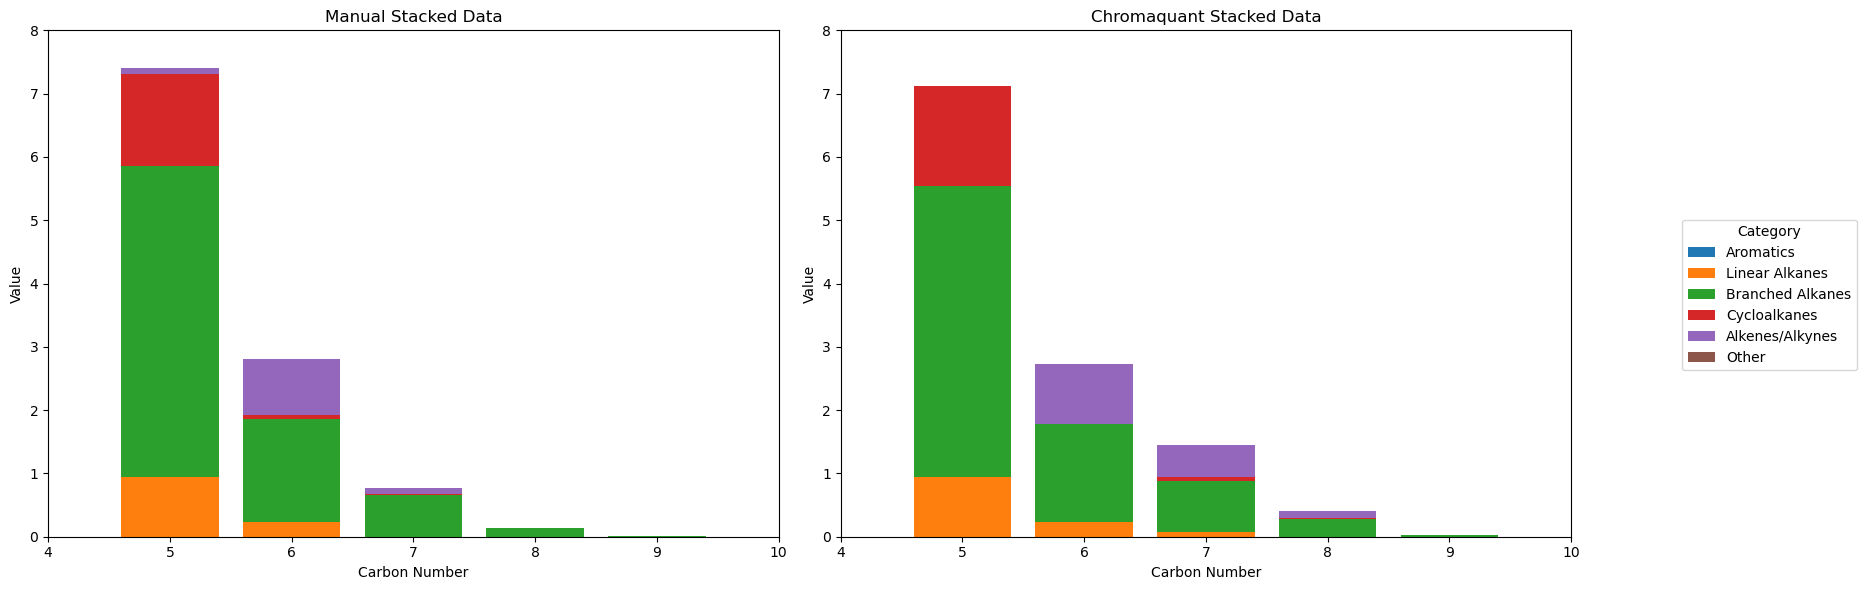

In [45]:
# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Function to plot stacked bars for a given DataFrame
def plot_stacked_bars(ax, df, categories, title):
    bottom = np.zeros(len(df))  # Initialize the bottom of the bars
    for category in categories:
        ax.bar(df.index, df[category], bottom=bottom, label=category)
        bottom += df[category]  # Update the bottom for the next category
    
    #edit this to find the limits automatically...
    ax.set_xlim(4, 10)  
    ax.set_ylim(0, 8) 

    ax.set_title(title)
    ax.set_xlabel("Carbon Number")
    ax.set_ylabel("Value")

# Plot manual_stacked_data
plot_stacked_bars(axes[0], manual_stacked_data, categories, "Manual Stacked Data")

# Plot chromaquant_stacked_data
plot_stacked_bars(axes[1], chromaquant_stacked_data, categories, "Chromaquant Stacked Data")

# Create a single shared legend
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, title="Category", bbox_to_anchor=(1.05, 0.5), loc="center left")

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

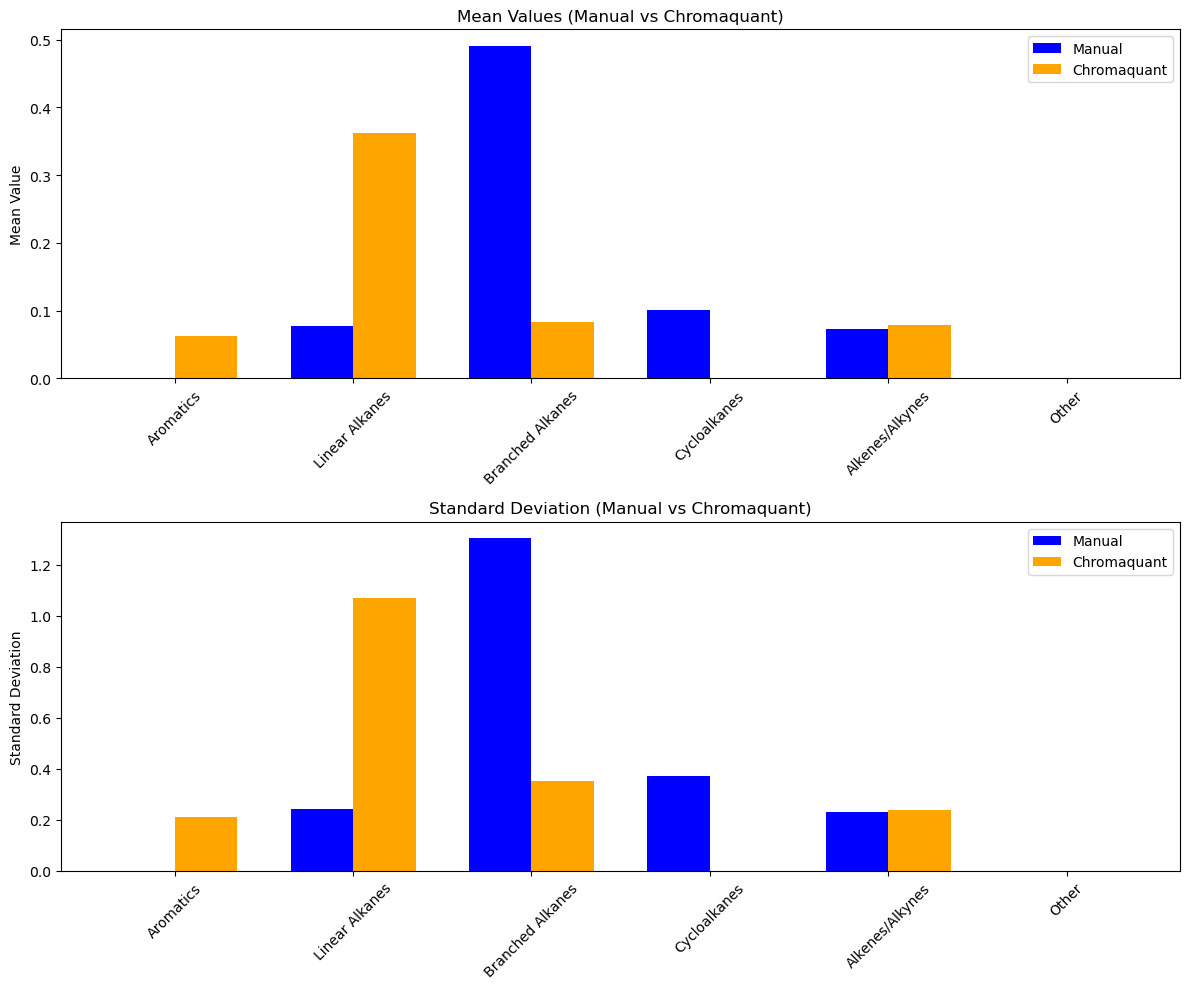

In [47]:
import matplotlib.pyplot as plt
import numpy as np

# Compute descriptive statistics for both DataFrames
manual_stats = manual_stacked_data.describe()
chromaquant_stats = chromaquant_stacked_data.describe()

# Define the categories to plot
categories = ["Aromatics", "Linear Alkanes", "Branched Alkanes", "Cycloalkanes", "Alkenes/Alkynes", "Other"]

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))

# Plot mean values
x = np.arange(len(categories))  # X-axis positions
width = 0.35  # Width of the bars

axes[0].bar(x - width/2, manual_stats.loc["mean"], width, label="Manual", color="blue")
axes[0].bar(x + width/2, chromaquant_stats.loc["mean"], width, label="Chromaquant", color="orange")

axes[0].set_title("Mean Values (Manual vs Chromaquant)")
axes[0].set_xticks(x)
axes[0].set_xticklabels(categories, rotation=45)
axes[0].set_ylabel("Mean Value")
axes[0].legend()

# Plot standard deviation
axes[1].bar(x - width/2, manual_stats.loc["std"], width, label="Manual", color="blue")
axes[1].bar(x + width/2, chromaquant_stats.loc["std"], width, label="Chromaquant", color="orange")

axes[1].set_title("Standard Deviation (Manual vs Chromaquant)")
axes[1].set_xticks(x)
axes[1].set_xticklabels(categories, rotation=45)
axes[1].set_ylabel("Standard Deviation")
axes[1].legend()

# Adjust layout
plt.tight_layout()
plt.show()


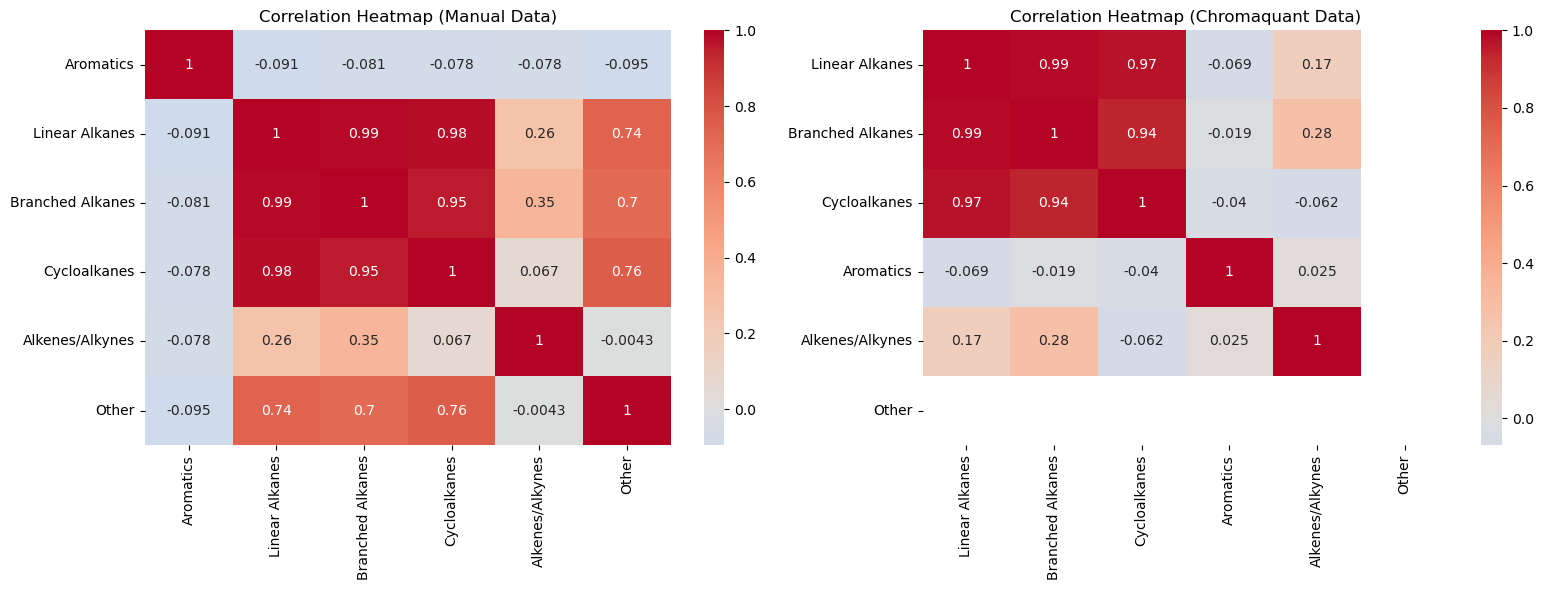

In [50]:
# Compute correlation matrices
manual_corr = manual_stacked_data.corr(method="pearson")
chromaquant_corr = chromaquant_stacked_data.corr(method="pearson")

# Create subplots for the heatmaps
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Plot heatmap for manual data
sns.heatmap(manual_corr, annot=True, cmap="coolwarm", center=0, ax=axes[0])
axes[0].set_title("Correlation Heatmap (Manual Data)")

# Plot heatmap for chromaquant data
sns.heatmap(chromaquant_corr, annot=True, cmap="coolwarm", center=0, ax=axes[1])
axes[1].set_title("Correlation Heatmap (Chromaquant Data)")

# Adjust layout
plt.tight_layout()
plt.show()